In [2]:
import numpy as np 
import os
import cv2
import matplotlib.pyplot as plt
from tensorflow import keras
import keras.utils as image
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation 

In [2]:
file_path = "test.zip"
output = file_path
if not os.path.exists("Test Set/"):
    gdown.download("https://drive.google.com/uc?id=1W94tVozlrHMY_SWE-45TvWT5PqQjElxc", file_path)
    gdown.extractall(file_path)
    if os.path.exists(file_path):
        os.remove(file_path)

In [3]:
gender_img_height = 378
gender_img_width = 378
emotions_img_height = 224
emotions_img_width = 224
gender_class_names = ["Man", "Woman"]
emotions_class_names = ["Angry", "Disgust", "Fear", "Happy", "Neutral", "Sad", "Surprise"]

In [4]:
#Load the Model
file_path = "test.zip"
if not os.path.exists("Gender Model/"):
    gdown.download("https://drive.google.com/uc?id=1easVnhBN9o1s60_eAyl8CGj_LHuPoXgc", file_path)
    gdown.extractall(file_path)
    if os.path.exists(file_path):
        os.remove(file_path)
gender_model = keras.models.load_model('Gender Model/')

#Load the Model
file_path = "test.zip"
if not os.path.exists("Emotions Model/"):
    gdown.download("https://drive.google.com/uc?id=1zwwyyd0CZZBDOYt6vSliejyq7NrGbRsT", file_path)
    gdown.extractall(file_path)
    if os.path.exists(file_path):
        os.remove(file_path)
emotions_model = keras.models.load_model('Emotions Model/')

In [23]:
def prepare_img(img):
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    return images

def write_on_box(frame, gender_class_names, gender_classes, x, y, h, sorted_dict):
    c = 10
    cv2.putText(frame, gender_class_names[np.where(gender_classes > 0.5, 1,0)[0][1]], (x, y+h+25), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)
    for key, value in sorted_dict.items():    
        cv2.putText(
            frame, 
            str(key) + " " + str(value)[:-5], 
            (x, y-c), 
            cv2.FONT_HERSHEY_SIMPLEX, 
            0.9, 
            (36,255,12), 
            2
        )
        c += 30
        
def plotChart(data): 
    # Plot the chart
    # Plot each data point
    fig = plt.figure(figsize=[8, 8])
    ax = fig.add_subplot(111, projection='polar')
    for key in data.keys():
        theta = np.arange( 0, 2*np.pi, 2*np.pi/len(data.keys()))
        if type(data[key]) == dict:
            values = [data[key][subkey] for subkey in data[key].keys()]
            if len(values) < len(theta):
                values.extend([np.nan for i in range(len(theta) - len(values))])
            elif len(values) > len(theta):
                theta.extend([np.nan for i in range(len(values) - len(theta))])

            ax.plot(theta, values, 'o-', label=key)
            ax.fill(theta, values, alpha=0.1)
        else:
            ax.plot([0, theta[list(data.keys()).index(key)]], [0, data[key]], 'o-', label=key)

    # Add labels
    ani = animation.FuncAnimation(fig, data, frames=range(100), repeat=True)
    plt.legend()
    plt.show()


1/1 [==============================] - 0s 37ms/step
Woman 'Happy': 0.9999882, 'Neutral': 0.9894403


<IPython.core.display.Javascript object>


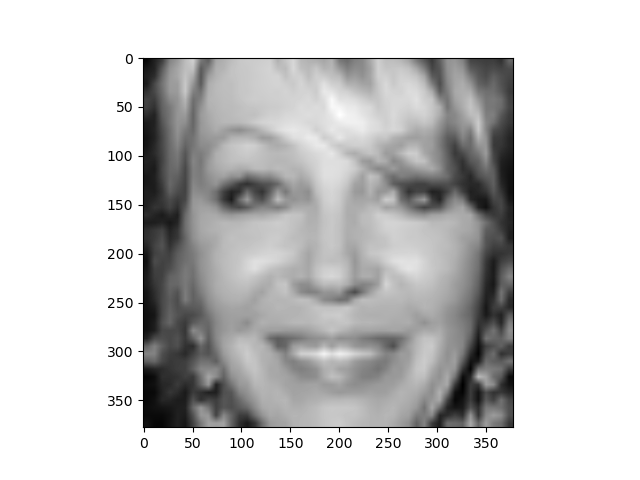

<IPython.core.display.Javascript object>


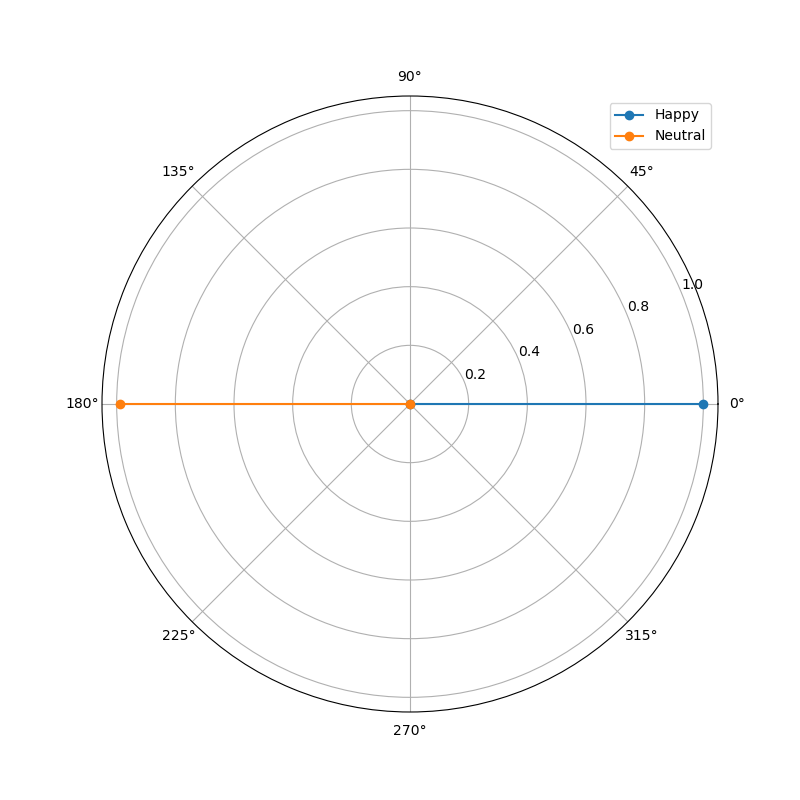

In [24]:
## Load and Predict an image
img = image.load_img("Test Set/333.png", color_mode = "grayscale")

gender_img = cv2.resize(np.float32(img), (gender_img_height, gender_img_width))
gender_classes = gender_model.predict(prepare_img(gender_img))

emotions_img = cv2.resize(np.float32(img), (emotions_img_height, emotions_img_width))
emotions_classes = emotions_model.predict(prepare_img(emotions_img))

index = list(np.where(np.where(emotions_classes > 0.8, 1, 0)[0] == 1)[0])
dictionary = dict()
sorted_dict = dict()
for i in index:
    dictionary[emotions_class_names[i]] = emotions_classes[0][i]
sorted_keys = sorted(dictionary, key=dictionary.get, reverse=True)
for w in sorted_keys:
    sorted_dict[w] = dictionary[w]
    
print(gender_class_names[np.where(gender_classes > 0.5, 1,0)[0][1]] + " " + str(sorted_dict)[1:-1])

plt.imshow(gender_img, cmap="gray")

plotChart(sorted_dict)

In [7]:
img = cv2.imread("test.jpg")

face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(img, 1.2, 4)
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
    g = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    resiz = cv2.resize(np.float32(g[y:y+h, x:x+w]), (emotions_img_height, emotions_img_width))
    clas = emotions_model.predict(prepare_img(resiz))
    gender_img = cv2.resize(np.float32(g[y:y+h, x:x+w]), (gender_img_height, gender_img_width))
    gender_classes = gender_model.predict(prepare_img(gender_img))
    index = list(np.where(np.where(clas > 0.8, 1, 0)[0] == 1)[0])
    dictionary = dict()
    sorted_dict = dict()
    for i in index:
        dictionary[emotions_class_names[i]] = clas[0][i]
    sorted_keys = sorted(dictionary, key=dictionary.get, reverse=True)
    for w in sorted_keys:
        sorted_dict[w] = dictionary[w]
    c = 10
    cv2.putText(img, gender_class_names[np.where(gender_classes > 0.5, 1,0)[0][1]], (x, y+h+25), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)
    for key, value in sorted_dict.items():    
        cv2.putText(
            img, 
            str(key) + " " + str(value)[:-5], 
            (x, y-c), 
            cv2.FONT_HERSHEY_SIMPLEX, 
            0.9, 
            (36,255,12), 
            2
        )
        c += 30
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

1/1 [==============================] - 0s 37ms/step


<IPython.core.display.Javascript object>


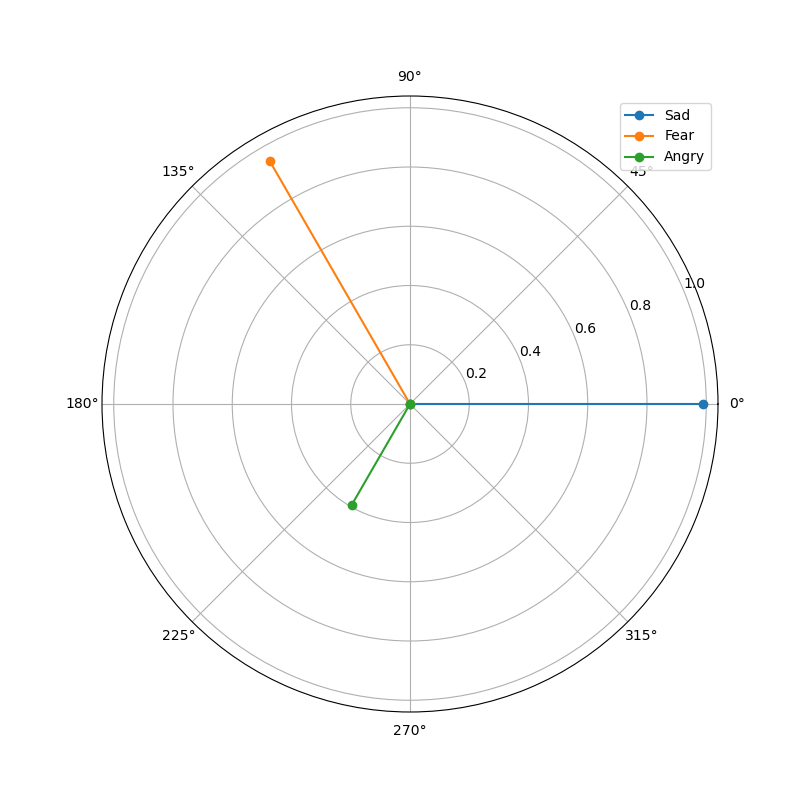

1/1 [==============================] - 0s 39ms/step


<IPython.core.display.Javascript object>


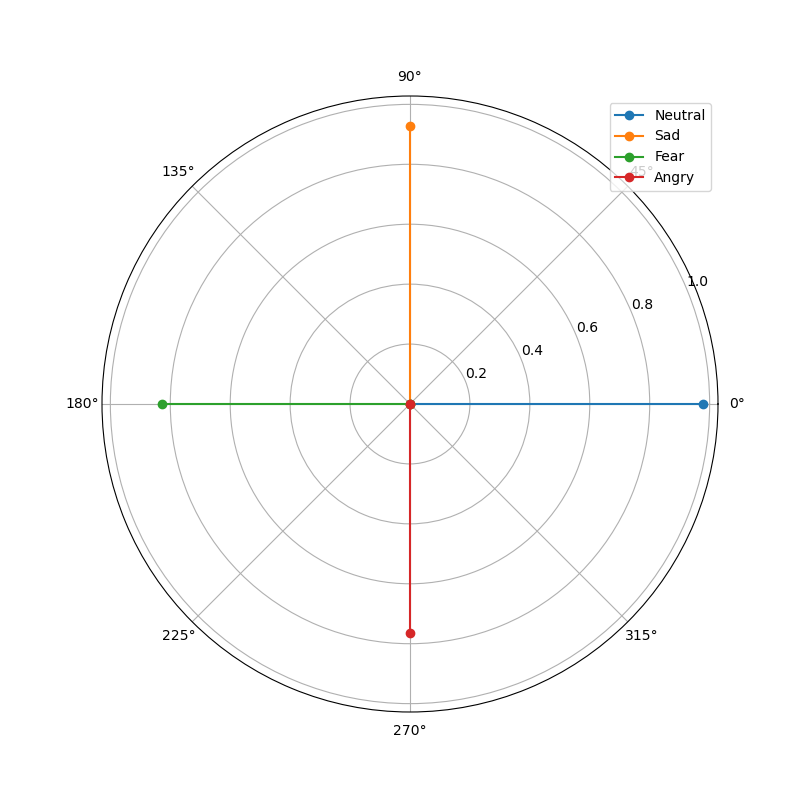

1/1 [==============================] - 0s 37ms/step


<IPython.core.display.Javascript object>


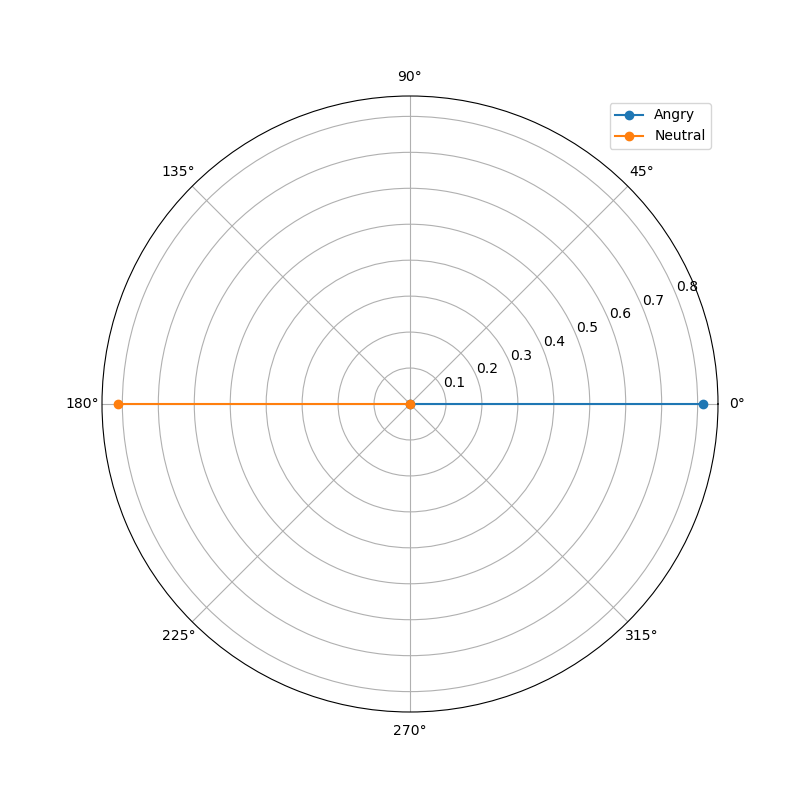

1/1 [==============================] - 0s 38ms/step


<IPython.core.display.Javascript object>


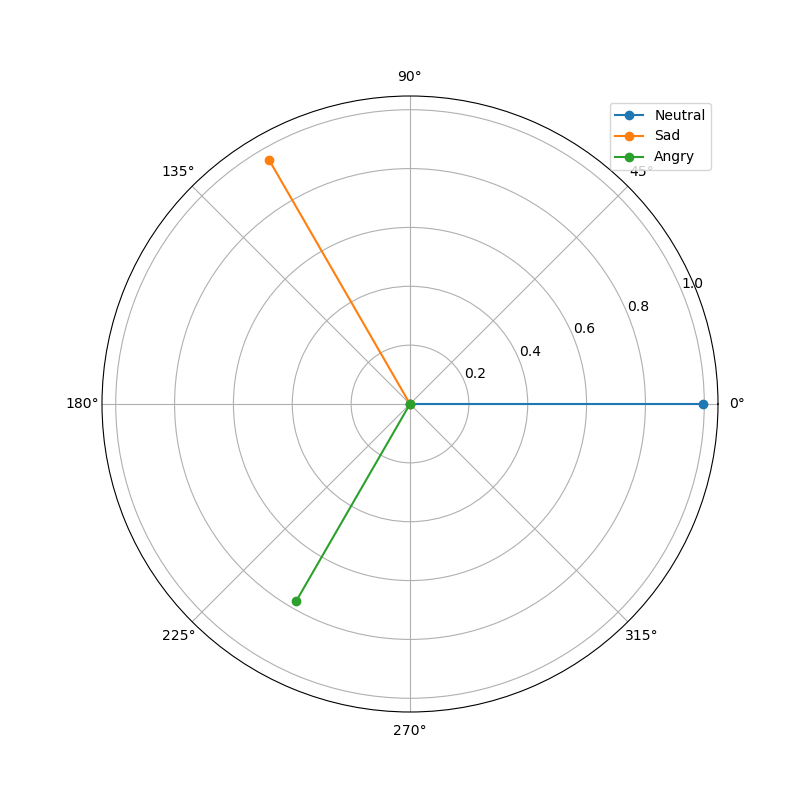

1/1 [==============================] - 0s 36ms/step


<IPython.core.display.Javascript object>


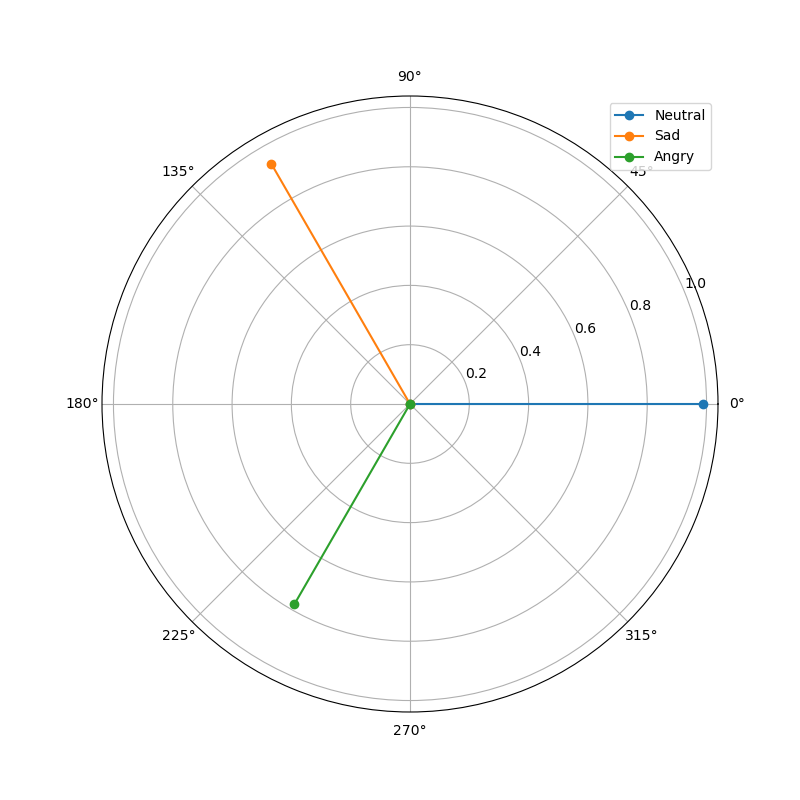

1/1 [==============================] - 0s 37ms/step


<IPython.core.display.Javascript object>


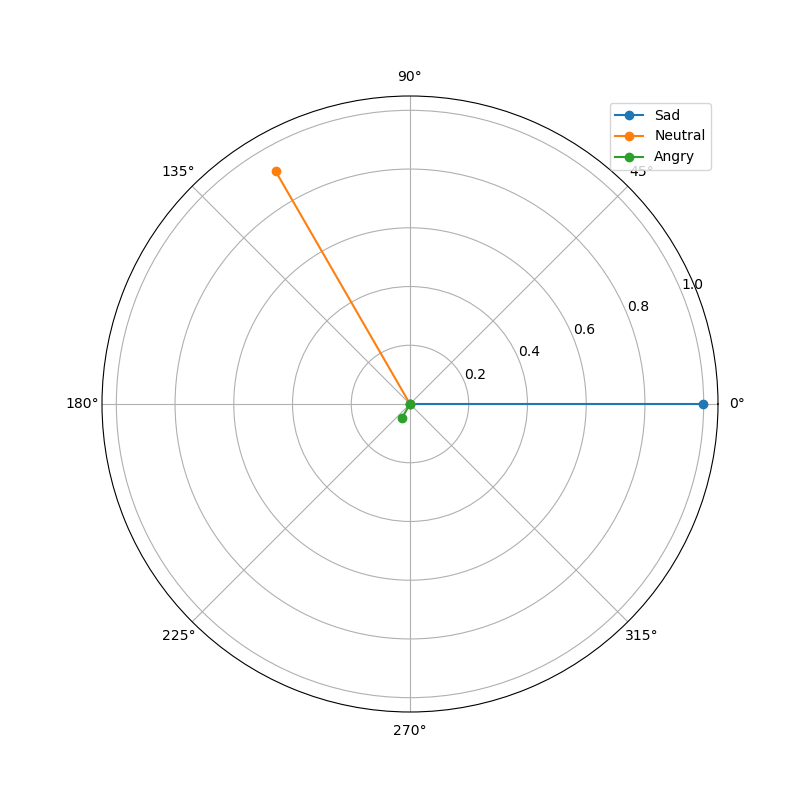

1/1 [==============================] - 0s 42ms/step


<IPython.core.display.Javascript object>


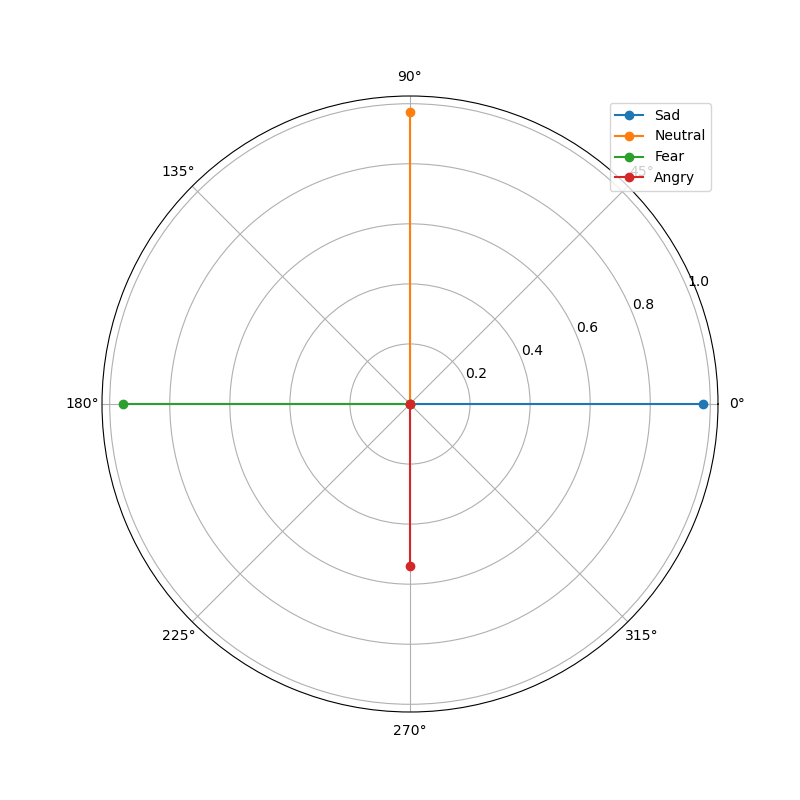

In [25]:
cap = cv2.VideoCapture(0)

if (cap.isOpened() == False): 
    print("Unable to read camera feed")

face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

skip_frames = 30
cur_frames = 0 
while True:
    ret, frame = cap.read()
    
    if ret:
        process_frame = cur_frames % skip_frames == 0
        gray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
        faces = face_cascade.detectMultiScale(gray, 1.1, 4)
        
        for (x, y, w, h) in faces:
            cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
            if process_frame:
                gender_img = cv2.resize(np.float32(gray[y:y+h, x:x+w]), (gender_img_height, gender_img_width))
                gender_classes = gender_model.predict(prepare_img(gender_img))
                resized = cv2.resize(gray[y:y+h, x:x+w], (emotions_img_height,emotions_img_width))
                emotions_classes = emotions_model.predict(prepare_img(resized))
                dictionary = dict()
                sorted_dict = dict()
                index = np.argwhere(emotions_classes > 0.8).flatten()
                for i in index:
                    dictionary[emotions_class_names[i]] = emotions_classes[0][i]
                sorted_keys = sorted(dictionary, key=dictionary.get, reverse=True)
                for w in sorted_keys:
                    sorted_dict[w] = dictionary[w]
                write_on_box(frame, gender_class_names, gender_classes, x, y, h, sorted_dict)
                plotChart(sorted_dict)
            else:
                write_on_box(frame, gender_class_names, gender_classes, x, y, h, sorted_dict)
        cv2.imshow('frame', frame)
        cur_frames += 1
        
        if cv2.waitKey(1) & 0xFF == ord('q'):
            cap.release()
            break
    else:
        break

cap.release()
cv2.destroyAllWindows()


<IPython.core.display.Javascript object>


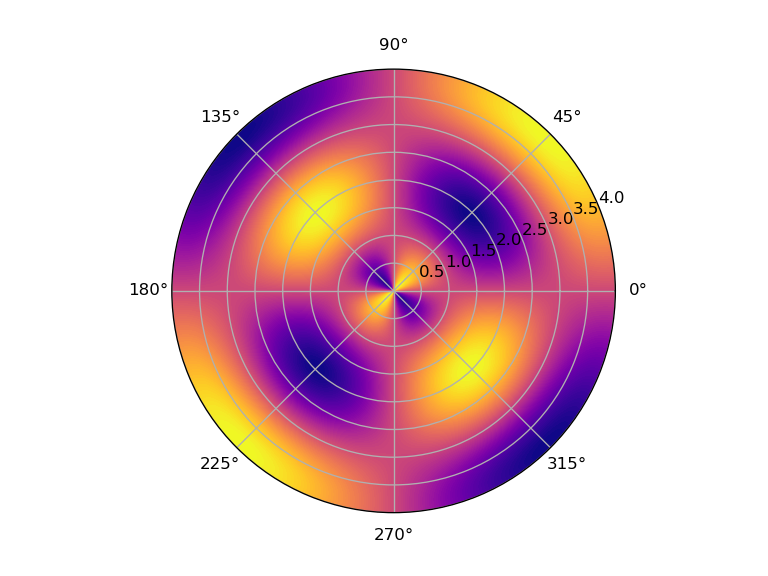

In [6]:
%matplotlib notebook

import numpy as np
import matplotlib.pylab as plt

def T(theta,a,b):        
    return a*np.sin(theta*b)   

def R(r,c,d):
    return c*np.cos(r*d)

rlist=np.arange(0,4.01,0.01)   #Angstroms
thetalist=np.radians(np.arange(0,361,1)) #Radians
rmesh, thetamesh = np.meshgrid(rlist, thetalist) #Generate a mesh

a = 1.5
b = 2
c = 2
d = 1.6

FullFunction = T(thetamesh,a,b)*R(rmesh,c,d)
FullFunction2 = FullFunction**2*rlist**2

fig, ax = plt.subplots(dpi=120,subplot_kw=dict(projection='polar'))
ax.contourf(thetamesh, rmesh, FullFunction, 100, cmap='plasma')


<IPython.core.display.Javascript object>


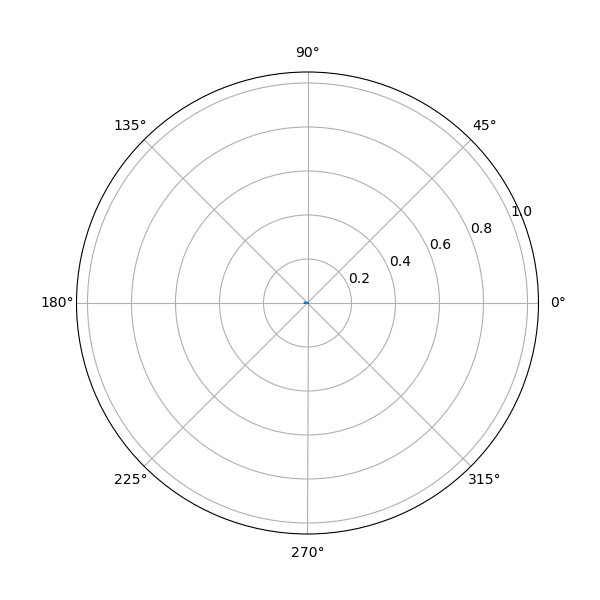

In [22]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation 

# Data:
mu = 1
e = 1
a = 1
c = 1

beta = np.linspace(0.0 ,2.5,25)
C = (mu*((e*a)**2)) / (16*(np.pi**2)*c) 

theta = np.linspace(-2 * np.pi, 2 * np.pi, 200)

fig = plt.figure(figsize=(6,6))
ax = plt.subplot(111, polar=True)

line, = ax.plot([],[])


def update(b):
    r = (np.sin(theta)**2)/(1 - b*np.cos(theta))**5
    line.set_xdata(b)
    line.set_ydata(r)
    print(b)
    return b

ani = FuncAnimation(fig, update,  blit=True)
plt.show()